# RANDOM VARIABLES - INTRODUCTION

## TUTORIAL

In this tutorial we will demonstrate basic functionality of PyStochastica's ``RandVar`` class, 
which is how the ``pystochastica.discrete`` package understands discrete random variables.

### PRELIMINARIES

#### MATHEMATICAL PRELIMINARIES 

A discrete probability space $\mathbf P$ consists of a countable set $\Omega$ of *samples*, 
a measure $\omega$ defining the probabilties of each sample and a space of events. 

**Remark.** *If $\Omega$ is finite, the space of events can be taken to be the power set $2^\Omega$.*

A discrete random variable on $\mathbf P$ is then a mapping $X : \Omega \rightarrow \mathbb R$ defining a new, discrete probability space 
through the pushforward construction. Its sample space is $X(\Omega)$ and its probability measure is $X_*\omega$. We will not need further details of this construction here. For our purposes, $X$ will simply be an object which 
can take on any of a discrete set of values (samples) with some defined probability. 

The *probability function* $P : 2^\Omega \rightarrow [0, 1]$ can be defined through the measure $\omega$. For any event $E$, 
the probability $X\in E$ is a number between $(0, 1)$ denoted $P(X\in E)$. If $E = (\leq \lambda)$, then $P(X\in E) = P(X \leq \lambda)$. The total law of probability states $\sum_{x\in X(\Omega)} P(X = x) = 1$.

**Example.**
Suppose $\mathbf P$ represents the act of flipping a fair coin. Then $\Omega = \{\mathrm{HEADS}, \mathrm{TAILS}\}$, the outcomes (or, samples) of
a coin flip. Their probabilities are encoded by the probability measure $\omega$. Since the coin is fair, we write $\omega = \frac{1}{2} \delta_{\mathrm{HEADS}} + \frac{1}{2}\delta_{\mathrm{TAILS}}$. A random variable $X$ can encode nominal value of realising an outcome of a coin flip. Say $\mathrm{HEADS}$ results in $+10$ while $\mathrm{TAILS}$ results in $-15$. Then $X(\Omega) = \{10, -15\}$ with probability measure $X_*\omega = \frac{1}{2}\delta_{10} + \frac{1}{2}\delta_{-15}$. The probability $X = 9$ is clearly $P(X = 9) = 0$, while for $X\leq 9$, $P(X\leq 9) = \frac{1}{2}$. Its *expected value* of $X$ is $\mathbb E[X] = \frac{1}{2}(10) + \frac{1}{2}(-15) = -\frac{5}{2}$. Its *variance* is $\mathbb E[X^2] - \mathbb E[X]^2 = 156.25$

Calculating probabilities becomes more challenging for linear combinations of multiple (independent) random variables. 
Random vectors, to be discussed in a later tutorial, are used to investigate dependent variables.

#### IN PYSTOCHASTICA

Random variables in ``pystochastica`` are instances of the ``RandVar`` class. The details on its probability space are stored in memory as a ``dict`` type object. It encodes samples in the sample space $\Omega$ as keys with probabilities from the probability measure $\omega$ as values.

### LIBRARY IMPORTS

Use the following line to import the ``RandVar`` class as ``rv``. As each sample for ``RandVar`` is a ``Sample`` type object, this will also need to be imported. Finally, the *name* of the random variable is a ``sympy.Expr`` type object, so we will need Python's ``sympy`` library.


In [1]:
from pystochastica.discrete.variables import RandVar as rv
from pystochastica.discrete.samples import Sample as smp
from pystochastica.discrete.utils import rvdict_to_init
import sympy as sp

### INITIALISATION

Suppose we would like to initialise a random variable $X$ with samples space $\Omega_X = \{-2, -1, 0, 1, 2\}$ and probability measure $\omega_X = 0.1\delta_{-2} + 0.35\delta_{-1} + 0.2\delta_0 + 0.25\delta_1 + 0.15\delta_2$. This can be initialised with the following keyword arguments 

- ``name``, type ``sympy.Expr``
- ``pspace``, type ``dict``

**Note.** *If the probabilities do not sum to `1.0`, an error will be raised and the random variable will not be initialised.*

In [2]:
X_name = sp.Symbol('X')
X_pspace: dict = {
    smp(name=X_name, value=-2): 0.1,
    smp(name=X_name, value=-1): 0.3,
    smp(name=X_name, value=0): 0.2,
    smp(name=X_name, value=1): 0.25,
    smp(name=X_name, value=2): 0.15
}

X = rv(name=X_name, pspace=X_pspace)

#### INITISLISATION THROUGH BARE DICTS

Random variables through the ``RandVar`` class can also be initialised from a "bare" dictionary with the ``rvdict_to_init`` utility function, located in ``pystochastica.discrete.utils``. With this function, it is not necessary to use the ``Sample`` class during initialisation as above, thereby making the initialisation code more readable and intuitive. 

See below and compare with how `X` was initialised through ``Sample`` above.


In [3]:
X_init = {
    'name': 'X', 
    'pspace': {
        '-2': 0.1,
        '-1': 0.3,
        '0': 0.2,
        '1': 0.25,
        '2': 0.15
}}
X = rv(**rvdict_to_init(X_init))

### MOMENTS

The expectation and variance can now be calculated easily by passing the ``calculate_expectation()`` and ``calculate_variance()`` methods. 
Passing the shorthand methods `.E` and `.V` respectively will return these to the console.


In [4]:
X.E, X.V

(0.05, 1.5475)

the Sharpe ratio of a random variable $X$ is the ratio of its expectation to deviation, i.e., $\mathbb E[X]/\sqrt{\mathrm{Var}(X)}$. 

With ``.E`` and ``.V``, the Sharpe ratio for `X` is then,

In [5]:
X.E / (X.V)**(1/2)

0.04019339355290704

### PROBABILITY

The probability of an event can be calculated through the ``.Prob`` method. The probability of the event `X != 0` is,

In [6]:
X.Prob('!= 0')

Decimal('0.80')

See that the ``Decimal`` library is used as part of the ``RandVar`` class to ensure numerical accuracy. See in particular that a ``significant_figures`` argument for rounding probabilties need not be passed, thereby mitigating floating point errors through accumulation.

### SAMPLING

The `.generate()` method on `X` allows for sampling the random variable $X$. The `iterations` parameter determines the number of times $X$ gets sampled. See below for `10` random samples of `X`.


In [7]:
X.generate(iterations=10)

array([Decimal('0.0'), Decimal('0.0'), Decimal('0.0'), Decimal('-2.0'),
       Decimal('-1.0'), Decimal('-1.0'), Decimal('-2.0'), Decimal('-1.0'),
       Decimal('2.0'), Decimal('-1.0')], dtype=object)

### BUILT-IN PLOTTING

#### PDF AND CDF

In order to visualise `X`, its probability density function and cumulative density function can be displayed with the `.pdf()` and `.cdf()` methods. 

By default, the number of iterations for `.pdf()` is set to `1000` but can be changed. 

Below we look at the pdf and cdf for `500` iterations and custom sizing with the `FIGSIZE` argument. 

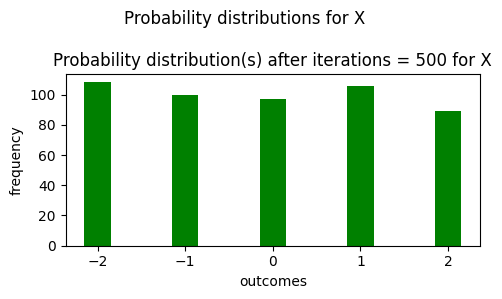

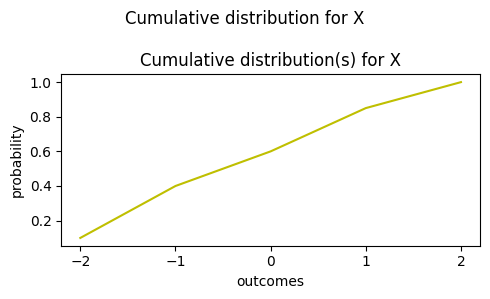

In [8]:
X.pdf(iterations=500, FIGSIZE=(5, 3), plt_kwargs = {'width': 0.3, 'color': 'g'})
X.cdf(FIGSIZE=(5, 3), plt_kwargs = {'color': 'y'})